<a href="https://colab.research.google.com/github/srimantmahapatra/srimant_code_repo_pub/blob/master/Online_Shoppers_Purchasing_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PURPOSE - AN ECOM BUSINESS WANTS TO FIND THE ONLINE SHOPPING PURCHASE INTENTION OF ITS VISITORS. AS A DATA SCIENTIST YOUR TASK IS TO IDENTIFY THE POTENTIAL FREQUENT SHOPPERS GROUP AND THE LIKELY HOOD THEY WILL MAKE A PURCHASE

In [ ]:
## DataSet- https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

"""
Created on Thu Sep 10 2020

@author: Srimant Mahapatra
"""

'\nCreated on Thu Sep 10 2020\n\n@author: Srimant Mahapatra\n'

IMPORT THE NECESSARY LIBRARIES

In [ ]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
np.set_printoptions(threshold=np.inf)
plt.figure(figsize=(30, 30))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

IMPORT THE DATA FROM GOOGLE DRIVE

In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML/online_shoppers_intention.csv')

CHECK THE FIRST 10 ROWS OF THE DATA

In [ ]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


CHECK THE COLUMN DATATYPES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

CHECK FOR NULL VALUES IN THE DATA

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Order the Months in their correct order otherwise it will not look in order in the EDA


In [ ]:
df['Month']=pd.Categorical(df['Month'],['Feb', 'Mar','May','June', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'],ordered=True)

Check for the discrete/categorical data (except float which will be continous ) This discrete data may require OneHotEncoding

In [ ]:
for col in df:
    if df[col].dtype != 'float64':
     print(col,df[col].dtype,df[col].sort_values().unique())

Administrative int64 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27]
Informational int64 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 24]
ProductRelated int64 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 197 198 19

Check Number of Unique visitors to the site

In [ ]:
df.groupby('VisitorType').size()

VisitorType
New_Visitor           1694
Other                   85
Returning_Visitor    10551
dtype: int64

Check Shoppers are shopping on Weekday or Weekend

In [ ]:
df.groupby('Weekend').size()

Weekend
False    9462
True     2868
dtype: int64

CHECK THE PAGES WHERE SHOPPERS SPENT HIGHEST TIME
 (Below is for one page type Administrative, there can be another for Product related)

In [ ]:
df.groupby('Administrative').agg({'Administrative_Duration': np.sum}).sort_values(by='Administrative_Duration')

,Administrative_Duration
Administrative,
0,0.000000
27,853.735949
23,897.817153
21,1237.072647
20,1507.131273
26,1561.717567
24,1831.332957
19,3320.622014
22,4017.768757


Check Number of Visitors to the site each Month

In [ ]:
df.groupby('Month',observed=True).size()

Month
Feb      184
Mar     1907
May     3364
June     288
Jul      432
Aug      433
Sep      448
Oct      549
Nov     2998
Dec     1727
dtype: int64

Pivot Table Information for Breakdown by Month,Weekend,Visitor Type

In [ ]:
pd.pivot_table(df,index=['Month'],columns=['Weekend','VisitorType'],values='Administrative',aggfunc=pd.Series.count,margins_name='Total',margins=True)

Weekend           False                                True        \
VisitorType New_Visitor Other Returning_Visitor New_Visitor Other   
Month                                                               
Feb                 1.0   NaN             155.0         NaN   NaN   
Mar               141.0   NaN            1285.0        91.0   NaN   
May               234.0   NaN            2415.0        85.0   NaN   
June               24.0   1.0             216.0         6.0   NaN   
Jul                41.0   NaN             287.0        13.0   NaN   
Aug                48.0   NaN             289.0        24.0   NaN   
Sep                86.0   NaN             266.0        22.0   NaN   
Oct                84.0   NaN             321.0        40.0   NaN   
Nov               292.0  20.0            1895.0       127.0   2.0   
Dec               264.0  57.0            1040.0        71.0   5.0   
Total            1215.0  78.0            8169.0       479.0   7.0   

Weekend                        Total  
VisitorType Returning_Visitor         
Month                                 
Feb                      28.0    184  
Mar                     390.0   1907  
May                     630.0   3364  
June                     41.0    288  
Jul                      91.0    432  
Aug                      72.0    433  
Sep                      74.0    448  
Oct                     104.0    549  
Nov                     662.0   2998  
Dec                     290.0   1727  
Total                  2382.0  12330

MATPLOTLIB GRAPH FOR CHECKING DISTRIBUTION FOR VISITORS BY MONTH

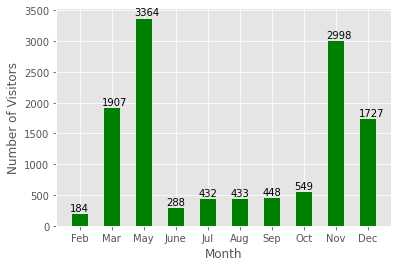

In [ ]:
ind = [x for x, _ in enumerate(df['Month'].unique())]
width = 0.5       
plt.bar(ind, df.groupby('Month',observed=True).size(),width,color='green')
plt.xticks(ind,df['Month'].sort_values().unique())
for i, v in enumerate(df.groupby('Month',observed=True).size()):
  plt.text(ind[i] - 0.3, v + 50, str(v))

  plt.xlabel("Month")
  plt.ylabel("Number of Visitors")  
plt.show()


SAME PLOT ABOVE IN SEABORN

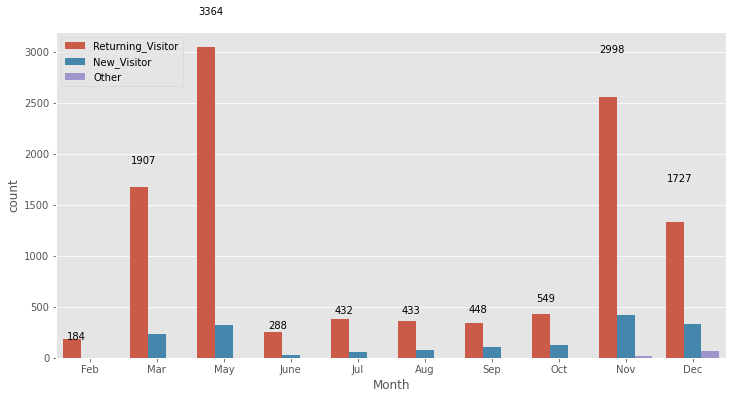

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['Month'].unique())]
g= sns.countplot(x='Month',hue='VisitorType',data= df,ax=ax)
g.legend(loc=2)
for i, v in enumerate(df.groupby('Month',observed=True).size()):
    g.text(ind[i]-.2 ,v-.4,str(v),color='black', ha="center")

SEABORN PLOT FOR MONTH WISE REVENUE DISTRIBUTION

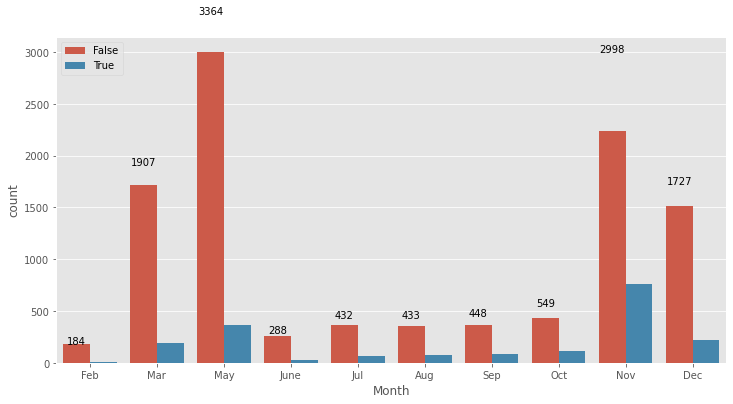

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['Month'].unique())]
g= sns.countplot(x='Month',hue='Revenue',data= df,ax=ax)
g.legend(loc=2)
for i, v in enumerate(df.groupby('Month',observed=True).size()):
    g.text(ind[i]-.2 ,v-.4,str(v),color='black', ha="center")

SEABORN PLOT FOR VISITOR TYPE REVENUE DISTRIBUTION

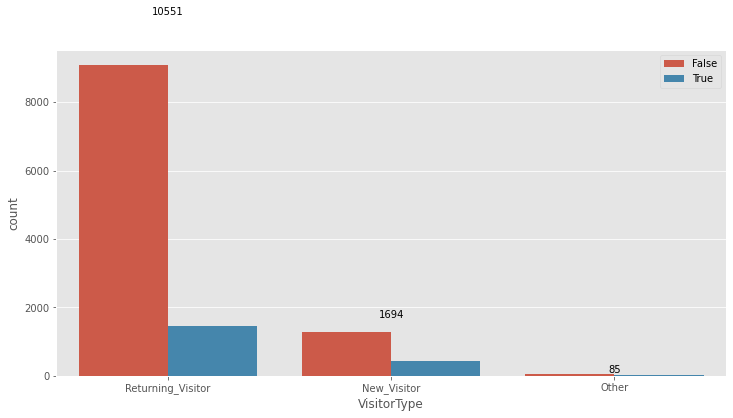

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['VisitorType'].unique())]
g= sns.countplot(x='VisitorType',hue='Revenue',data= df,ax=ax)
g.legend(loc=1)
for i, v in enumerate(df.groupby('VisitorType',observed=True).size().sort_values(ascending=False)):
    g.text(ind[i] ,v-.25,str(v),color='black', ha="center")

SEABORN PLOT FOR WEEKEND/WEEKDAY REVENUE DISTRIBUTION

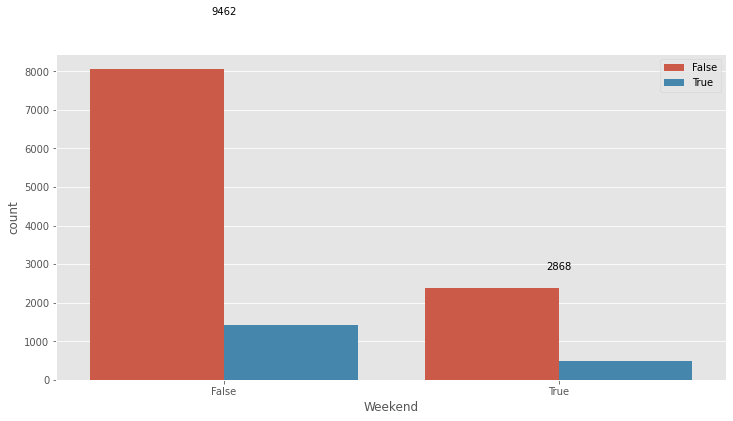

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['Weekend'].unique())]
g= sns.countplot(x='Weekend',hue='Revenue',data= df,ax=ax)
g.legend(loc=1)
for i, v in enumerate(df.groupby('Weekend',observed=True).size()):
    g.text(ind[i] ,v-.25,str(v),color='black', ha="center")

SEABORN PLOT FOR VISITORTYPE VISITING ON WEEKDAY OR WEEKEND

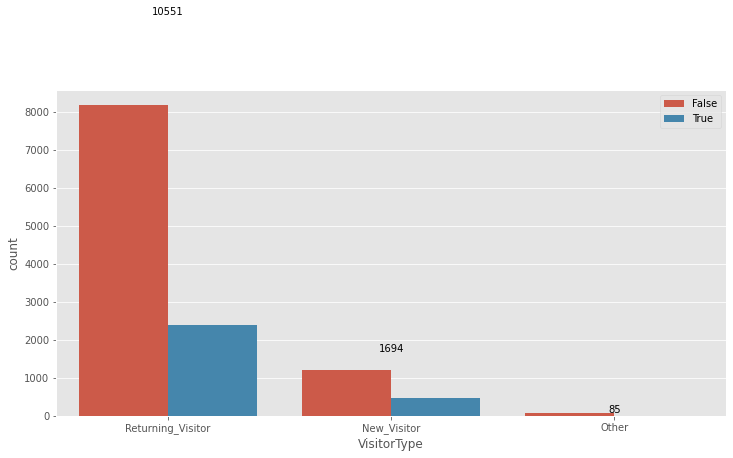

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['VisitorType'].unique())]
g= sns.countplot(x='VisitorType',hue='Weekend',data= df,ax=ax)
g.legend(loc=1)
for i, v in enumerate(df.groupby('VisitorType',observed=True).size().sort_values(ascending=False)):
    g.text(ind[i] ,v-.25,str(v),color='black', ha="center")

SEABORN PLOT FOR VISITORTYPE BY REGION

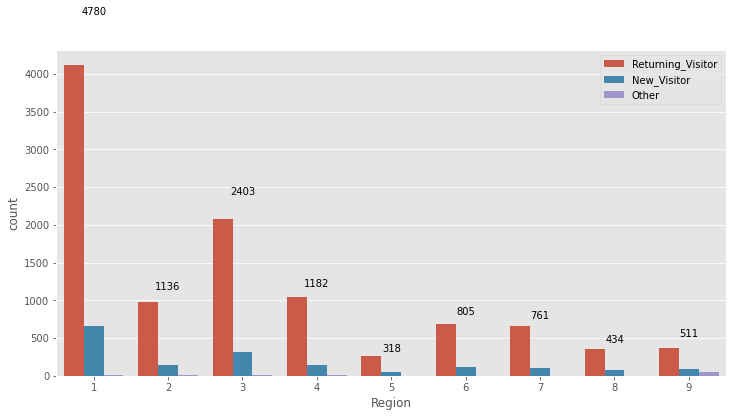

In [ ]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['Region'].unique())]
g= sns.countplot(x='Region',hue='VisitorType',data= df,ax=ax)
g.legend(loc=1)
for i, v in enumerate(df.groupby('Region',observed=True).size()):
    g.text(ind[i] ,v-.25,str(v),color='black', ha="center")

SEABORN COORELATION MATRIX

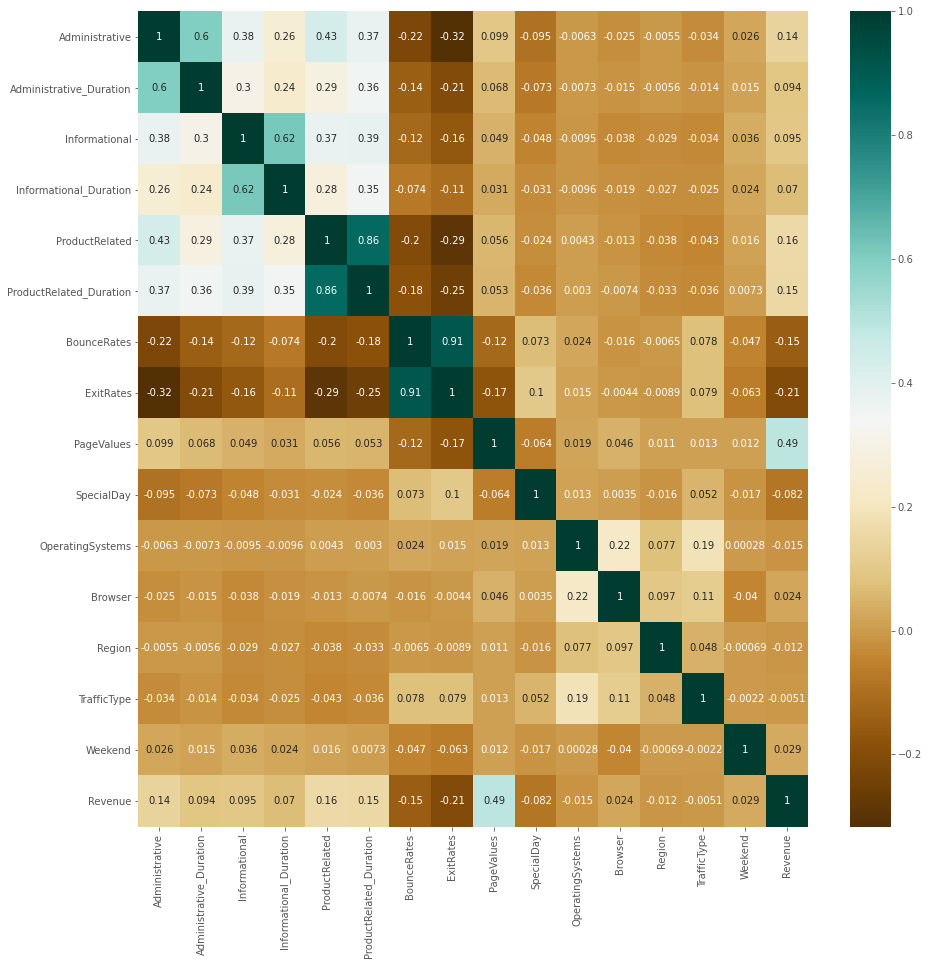

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)
plt.show()

ONE HOT ENCODING DISCRETE NUMERIC AND CATEGORICAL DATA

In [ ]:
Z=pd.get_dummies(df,drop_first=True)
Z.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,False,False,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,4,1,9,3,False,False,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,False,False,0,0,1,0,0,0,0,0,0,0,0,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,4,3,3,False,False,0,0,1,0,0,0,0,0,0,0,0,1
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,1,2,1,5,True,False,0,0,1,0,0,0,0,0,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,3,False,False,0,0,1,0,0,0,0,0,0,0,0,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,1


MULTIVARIATE ANALYSIS WITH SCATTER MATRIX FOR BOUNCERATES VARIABLE

<Figure size 1080x504 with 0 Axes>

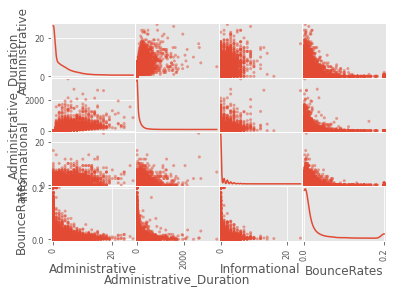

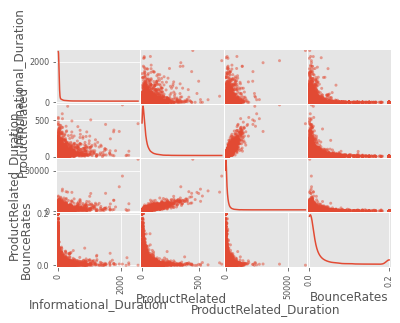

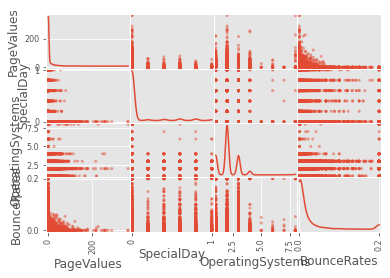

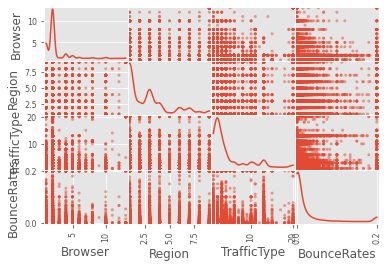

In [ ]:
plt.figure(figsize=(15,7))
pd.plotting.scatter_matrix(Z.iloc[:,[0,1,2,6]], diagonal='kde')
pd.plotting.scatter_matrix(Z.iloc[:,[3,4,5,6]], diagonal='kde')
pd.plotting.scatter_matrix(Z.iloc[:,[8,9,10,6]], diagonal='kde')
pd.plotting.scatter_matrix(Z.iloc[:,[11,12,13,6]], diagonal='kde')
plt.show()

ASSIGN THE ONE HOT ENCODED DATA TO VARIABLE X FOR BOUNCERATES CLUSTERING

In [ ]:
Z=Z.iloc[:,[1,6]].values

THE NEXT 3 CELLS ARE TO SHOW THE EFFECT OF FEATURE SCALING ON ELBOW METHOD , POST THIS I HAVE RERUN ABOVE CELL FOR THE DATA TO BE REASSIGNED TO X (pd.get_dummies(df,drop_first=True)

In [ ]:
""""#""""
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(Z)


In [ ]:
"""print(Z[0:10,:])

[[-0.4571914   3.66718879]
 [-0.4571914  -0.457683  ]
 [-0.4571914   3.66718879]
 [-0.4571914   0.57353495]
 [-0.4571914  -0.04519582]
 [-0.4571914  -0.13203522]
 [-0.4571914   3.66718879]
 [-0.4571914   3.66718879]
 [-0.4571914  -0.457683  ]
 [-0.4571914  -0.457683  ]]


ELBOW METHOD AFTER FEATURE SCALING EFFECT

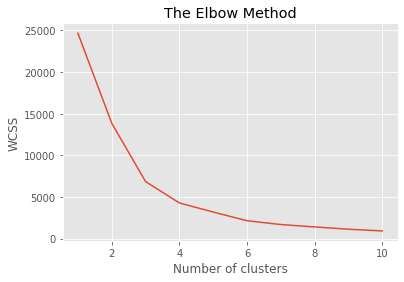

In [ ]:
"""from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ELBOW METHOD TO GET NUMBER OF CLUSTERS (Rerun X Assignment if you had tested for effect of feature scaling) -BOUNCE RATES AND ADMINISTRATIVE DURATION

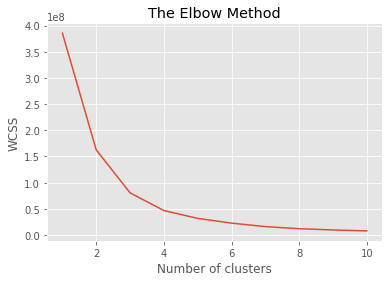

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)

In [ ]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

SCATTER PLOT SHOWING CLUSTERS FOR BOUNCE RATES VS ADMINISTRATIVE DURATION

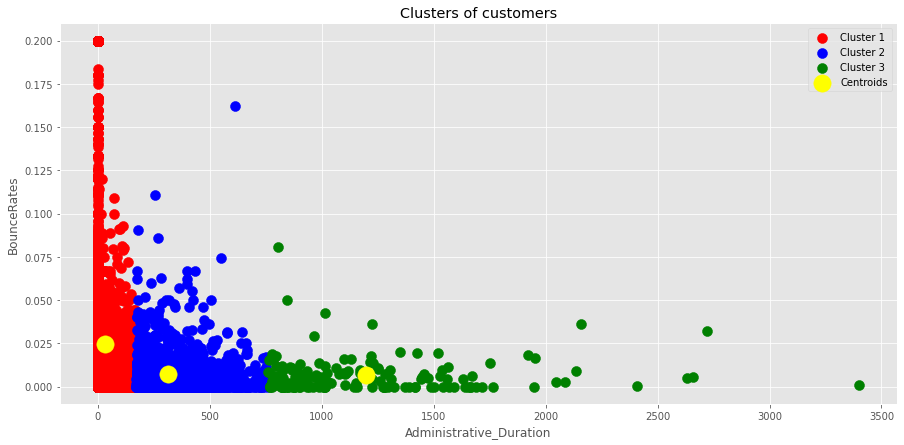

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Administrative_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

ELBOW METHOD FOR CLUSTERS FOR PRODUCT RELATED INFORMATION AND BOUNCE RATES 

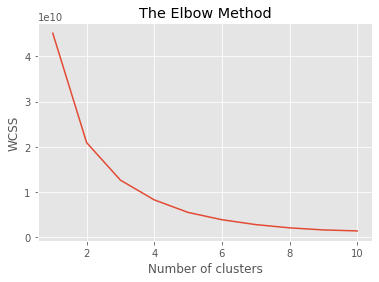

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df.loc[:,['ProductRelated_Duration','BounceRates']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df.loc[:,['ProductRelated_Duration','BounceRates']])

SCATTER PLOT SHOWING CLUSTERS FOR BOUNCE RATES VS ProductRelated_Duration

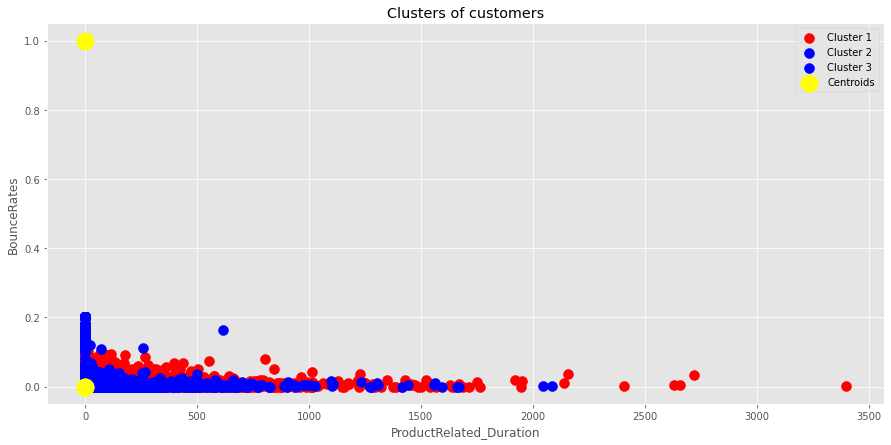

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

AS WE HAD ONLY SELECTED 2 COLUMNS FOR CLUSTERING RERUNNING TO POPULATE Z (WE CAN ASSIGN 2 DIFFERENT VARIABLES ONE FOR ONE HOT ENCODING AND OTHER FOR CLUSTERING I DID IT AS WAS SHORT OF TIME :) )

In [ ]:
Z=pd.get_dummies(df,drop_first=True)

****** SECTION -CLASSIFICATION PART******

Import the libraries for Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc

Divide the Independent (X) and Dependent Variable (y)

In [ ]:
X=Z.iloc[:,Z.columns!='Revenue'].values
y=Z.iloc[:,Z.columns=='Revenue'].values

Split Data into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

FEATURE SCALING TRAINING DATA AND THEN TRANSFORMING TEST DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1.Creating the classfication models

2.Creating the probability variable to get the AUC value

3.Creating the predict variable to get the accuracy score for the model

In [ ]:
clf1 = LogisticRegression(random_state = 0)
probas1_ =clf1.fit(X_train, y_train).predict_proba(X_test)
y_pred1 =clf1.fit(X_train, y_train).predict(X_test)

clf2 = SVC(kernel = 'linear', random_state = 0, probability=True)
probas2_ =clf2.fit(X_train, y_train).predict_proba(X_test)
y_pred2 =clf2.fit(X_train, y_train).predict(X_test)


clf3 = SVC(kernel = 'rbf', random_state = 0, probability=True)
probas3_ =clf3.fit(X_train, y_train).predict_proba(X_test)
y_pred3 =clf3.fit(X_train, y_train).predict(X_test)


clf4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
probas4_ =clf4.fit(X_train, y_train).predict_proba(X_test)
y_pred4 =clf4.fit(X_train, y_train).predict(X_test)


clf5 = GaussianNB()
probas5_ =clf5.fit(X_train, y_train).predict_proba(X_test)
y_pred5 =clf5.fit(X_train, y_train).predict(X_test)


clf6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
probas6_ =clf6.fit(X_train, y_train).predict_proba(X_test)
y_pred6 =clf6.fit(X_train, y_train).predict(X_test)


clf7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
probas7_ =clf7.fit(X_train, y_train).predict_proba(X_test)
y_pred7 =clf7.fit(X_train, y_train).predict(X_test)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

PRINT THE ACCURACY SCORES OF THE MODELS

In [ ]:
print('LR Accuracy Score:',accuracy_score(y_test, y_pred1),
      'precision_score:',precision_score(y_test, y_pred1),
      'recall_score:',recall_score(y_test, y_pred1),
      'f1_score:',f1_score(y_test, y_pred1),sep='\n',end='\n\n\n')
print('SVC Linear Accuracy Score:',accuracy_score(y_test, y_pred2),
      'precision_score:',precision_score(y_test, y_pred2),
      'recall_score:',recall_score(y_test, y_pred2),
      'f1_score:',f1_score(y_test, y_pred2),sep='\n',end='\n\n\n')
print('SVC RBF Accuracy Score:',accuracy_score(y_test, y_pred3),
      'precision_score:',precision_score(y_test, y_pred3),
      'recall_score:',recall_score(y_test, y_pred3),
      'f1_score:',f1_score(y_test, y_pred3),sep='\n',end='\n\n\n')
print('KNN Accuracy Score:',accuracy_score(y_test, y_pred4),
      'precision_score:',precision_score(y_test, y_pred4),
      'recall_score:',recall_score(y_test, y_pred4),
      'f1_score:',f1_score(y_test, y_pred4),sep='\n',end='\n\n\n')
print('Naive Bayes Accuracy Score:',accuracy_score(y_test, y_pred5),
      'precision_score:',precision_score(y_test, y_pred5),
      'recall_score:',recall_score(y_test, y_pred5),
      'f1_score:',f1_score(y_test, y_pred5),sep='\n',end='\n\n\n')
print('DT Accuracy Score:',accuracy_score(y_test, y_pred6),
      'precision_score:',precision_score(y_test, y_pred6),
      'recall_score:',recall_score(y_test, y_pred6),
      'f1_score:',f1_score(y_test, y_pred6),sep='\n',end='\n\n\n')
print('RF Accuracy Score:',accuracy_score(y_test, y_pred7),
      'precision_score:',precision_score(y_test, y_pred7),
      'recall_score:',recall_score(y_test, y_pred7),
      'f1_score:',f1_score(y_test, y_pred7),sep='\n',end='\n\n\n')


LR Accuracy Score:
0.8718780408692831
precision_score:
0.749034749034749
recall_score:
0.3702290076335878
f1_score:
0.4955300127713921


SVC Linear Accuracy Score:
0.8699318845280571
precision_score:
0.7320754716981132
recall_score:
0.3702290076335878
f1_score:
0.49176172370088717


SVC RBF Accuracy Score:
0.8783652286733701
precision_score:
0.7335423197492164
recall_score:
0.44656488549618323
f1_score:
0.5551601423487544


KNN Accuracy Score:
0.859552384041518
precision_score:
0.6678966789667896
recall_score:
0.34541984732824427
f1_score:
0.4553459119496855


Naive Bayes Accuracy Score:
0.7116445021083361
precision_score:
0.34676742233417296
recall_score:
0.7881679389312977
f1_score:
0.48163265306122444


DT Accuracy Score:
0.8572818683100876
precision_score:
0.5766423357664233
recall_score:
0.6030534351145038
f1_score:
0.5895522388059701


RF Accuracy Score:
0.8890690885501136
precision_score:
0.7369791666666666
recall_score:
0.5400763358778626
f1_score:
0.6233480176211453




Getting the AUC scores for the models

In [ ]:
fp1, tp1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc_model3 = auc(fp3, tp3)
fp4, tp4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc_model4 = auc(fp4, tp4)
fp5, tp5, thresholds5 = roc_curve(y_test, probas5_[:, 1])
roc_auc_model5 = auc(fp5, tp5)
fp6, tp6, thresholds6 = roc_curve(y_test, probas6_[:, 1])
roc_auc_model6 = auc(fp6, tp6)
fp7, tp7, thresholds7 = roc_curve(y_test, probas7_[:, 1])
roc_auc_model7 = auc(fp7, tp7)
print("AUC for Logistic Regression Model : ",roc_auc_model1)
print("AUC for SVC Linear Model:", roc_auc_model2)
print("AUC for SVC RBF Model :" ,roc_auc_model3)
print("AUC for KNN  model :", roc_auc_model4)
print("AUC for Naive Bayes  model :", roc_auc_model5)
print("AUC for DT  model :", roc_auc_model6)
print("AUC for RF  model :", roc_auc_model7)

AUC for Logistic Regression Model :  0.8847041872868995
AUC for SVC Linear Model: 0.8821838951880655
AUC for SVC RBF Model : 0.8601448562027749
AUC for KNN  model : 0.772897034564432
AUC for Naive Bayes  model : 0.812839133845819
AUC for DT  model : 0.7561965104450987
AUC for RF  model : 0.8926685191316981


PLOTTING THE AUC-ROC Curve

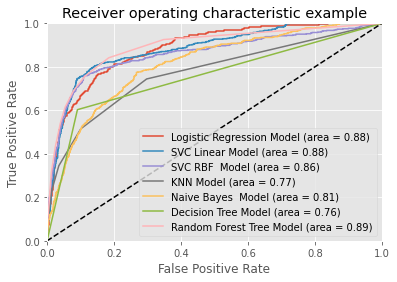

In [ ]:
plt.clf()
plt.plot(fp1, tp1, label='Logistic Regression Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='SVC Linear Model (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='SVC RBF  Model (area = %0.2f)' % roc_auc_model3)
plt.plot(fp4, tp4, label='KNN Model (area = %0.2f)' % roc_auc_model4)
plt.plot(fp5, tp5, label='Naive Bayes  Model (area = %0.2f)' % roc_auc_model5)
plt.plot(fp6, tp6, label='Decision Tree Model (area = %0.2f)' % roc_auc_model6)
plt.plot(fp7, tp7, label='Random Forest Tree Model (area = %0.2f)' % roc_auc_model7)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**HENCE TO CONCLUDE THE BEST CLASSIFICATION IS FOR RANDOM FOREST TREES CLASSIFICATION AND WE CAN USE IT TO PREDICT FUTURE VALUES FOR REVENUE**
